In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

In [ ]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# this dataset has 890 rows and 12 columns 
# most of the columns has numeric datatype i.e int or float
# there are also some columns with object datatype which is arbitary datatype 
# we can also see that there are some Nan values present in few columns like age ,cabin and embarked

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


1 There are total 891 instances present in data. 

2 The avg age of the passengers travelling in titanic is concentrated around 30 yrs old

3 There are 67% passengers are of age of 15yrs old to 45 yrs old and 95% passengers are of the age of 0 to 60 yrs. Also 4% passengers are above the 60 yrs old.

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

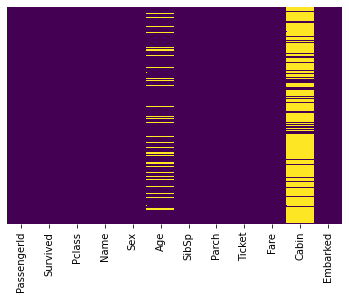

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

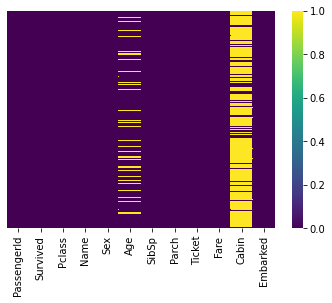

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

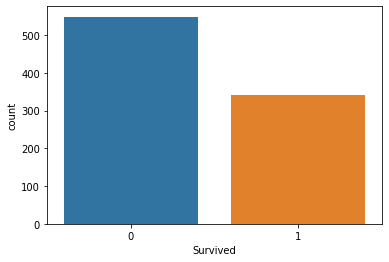

In [ ]:
# what is survival Rate of titanic 
sns.countplot(data=df,x="Survived")

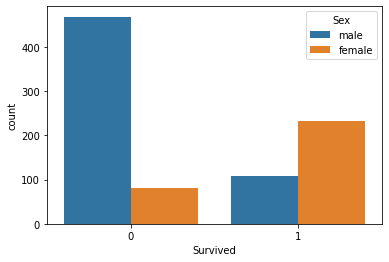

In [ ]:
sns.countplot(data=df,x='Survived',hue="Sex")

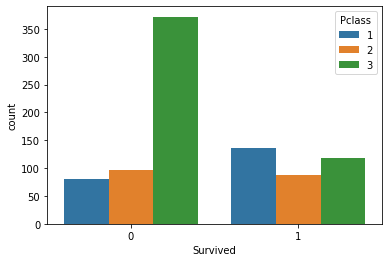

In [ ]:
sns.countplot(data=df,x='Survived',hue='Pclass')

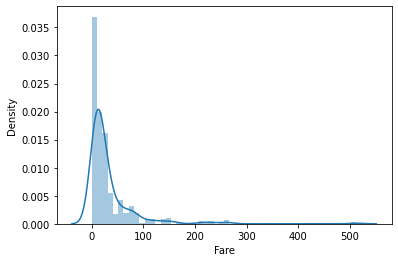

In [ ]:
sns.distplot(df['Fare'])

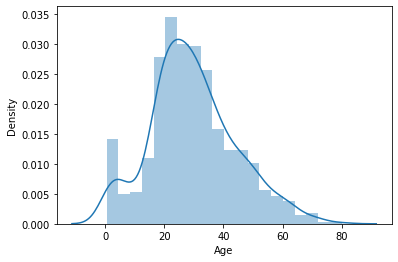

In [ ]:
sns.distplot(df['Age'])

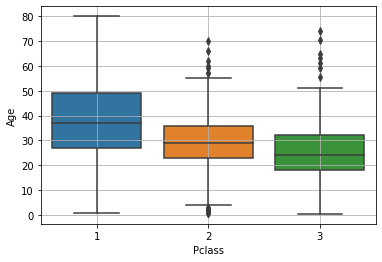

In [ ]:
sns.boxplot(data=df,x='Pclass',y='Age')
plt.grid(True)

In [ ]:
def fillage(cols):
  age= cols[0]
  pclass=cols[1]

  if(pd.isnull(age)):
    if(pclass==1):
      return 38
    elif(pclass==2):
      return 29
    else:
      return 24
  else:
    return age

In [ ]:
df['Age'] = df[['Age','Pclass']].apply(fillage,axis=1)

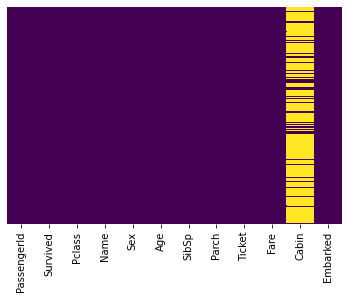

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False ,cmap='viridis')

In [ ]:
df.drop('Cabin',axis=1,inplace=True)

In [ ]:
df.dropna(inplace=True)

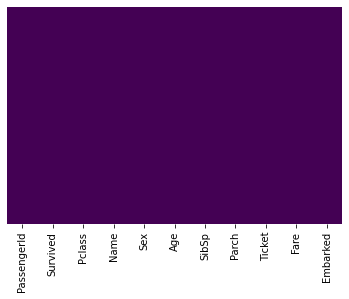

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False ,cmap='viridis')

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder

In [ ]:
le=LabelEncoder
ohe=OneHotEncoder
oe=OrdinalEncoder

In [ ]:
X=df.iloc[:,1:] #2D
y=df.iloc[:,0] #1D

In [ ]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,24.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [ ]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=
                       [
                          (
                                      'encoder',OrdinalEncoder(),
                                      ['Sex','Embarked'])],
                       remainder='passthrough')
X=ct.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest =train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(Xtrain ,ytrain)

KNeighborsClassifier()

In [ ]:
Train=knn.score(Xtrain,ytrain)
Test=knn.score(Xtest,ytest)

print(f"TRAINING SCORE :",Train)
print(f"TESTING SCORE :",Test)

TRAINING SCORE : 0.7813504823151125
TESTING SCORE : 0.6928838951310862


In [ ]:
trainac=[]
testac=[]

for i in range(1,31):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(Xtrain,ytrain)

  trainac.append(knn.score(Xtrain,ytrain))
  testac.append(knn.score(Xtest,ytest))

In [ ]:
dic={
    'n':np.arange(1,31),
     'train':trainac,
     'test':testac     
}
hp= pd.DataFrame(dic)
hp

,n,train,test
0,1,0.987138,0.715356
1,2,0.829582,0.674157
2,3,0.844051,0.696629
3,4,0.786174,0.674157
4,5,0.781350,0.692884
5,6,0.763666,0.666667
6,7,0.763666,0.677903
7,8,0.754019,0.681648
8,9,0.758842,0.666667
9,10,0.745981,0.670412


In [ ]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(Xtrain,ytrain)
ypred = knn.predict(Xtest)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.74      0.82      0.77       166
           1       0.63      0.51      0.57       101

    accuracy                           0.70       267
   macro avg       0.68      0.67      0.67       267
weighted avg       0.70      0.70      0.70       267



In [ ]:
from sklearn.linear_model import LogisticRegression
logreg =LogisticRegression()
logreg.fit(Xtrain,ytrain)

LogisticRegression()

In [ ]:
ypred = logreg.predict(Xtest)

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       166
           1       0.79      0.80      0.79       101

    accuracy                           0.84       267
   macro avg       0.83      0.83      0.83       267
weighted avg       0.84      0.84      0.84       267



In [ ]:
logreg.score(Xtrain,ytrain)

0.7909967845659164

In [ ]:
logreg.score(Xtest,ytest)

0.8426966292134831

In [ ]:
df.Survived.value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(Xtrain, ytrain)

train = logreg.score(Xtrain, ytrain)
test = logreg.score(Xtest, ytest)

print(f"Training score : {train}")
print(f"Testing score : {test}")

Training score : 0.8038585209003215
Testing score : 0.8052434456928839


In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(Xtrain, ytrain)
ypred = svm.predict(Xtest)

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.69      0.92      0.79       165
           1       0.72      0.32      0.45       102

    accuracy                           0.69       267
   macro avg       0.70      0.62      0.62       267
weighted avg       0.70      0.69      0.66       267



In [ ]:
train = svm.score(Xtrain, ytrain)
test = svm.score(Xtest, ytest)

print(f"Training score : {train}")
print(f"Testing score : {test}")

Training score : 0.6752411575562701
Testing score : 0.6928838951310862


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(Xtrain, ytrain)
ypred = svm.predict(Xtest)

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       165
           1       0.85      0.71      0.77       102

    accuracy                           0.84       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.84      0.84      0.84       267

